## **Importing libraries**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from prophet import Prophet

## **Exploring the dataset**

In [4]:
df = pd.read_csv("AEP_hourly.csv")

In [5]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index(['Datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [8]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [9]:
df.isnull().sum()

AEP_MW    0
dtype: int64

In [10]:
df.isna().sum()

AEP_MW    0
dtype: int64

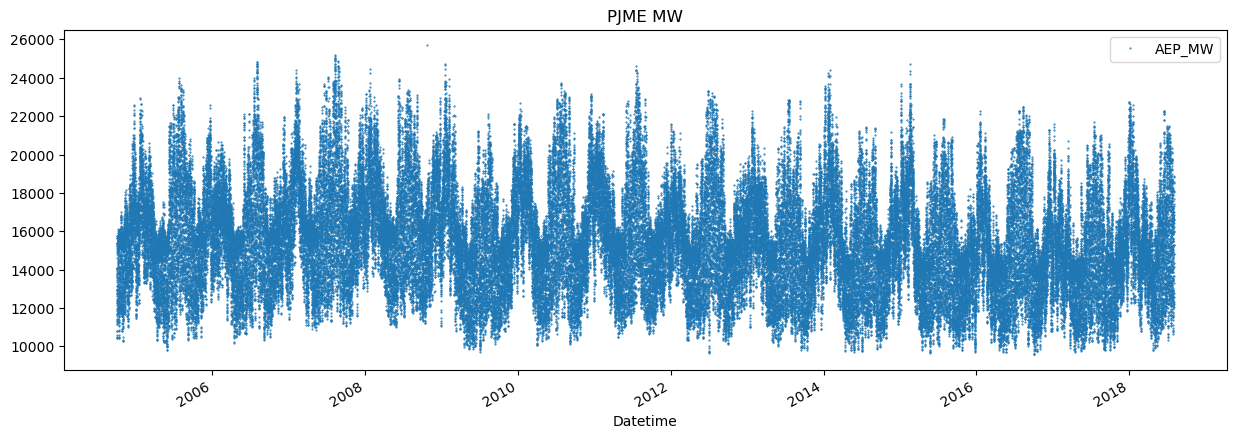

In [11]:
df.plot(style='.',
          figsize=(15, 5),
          ms=1,
          title='PJME MW')
plt.show()

## **Splitting the dataset**

In [13]:
split_date = '1-Jan-2017'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

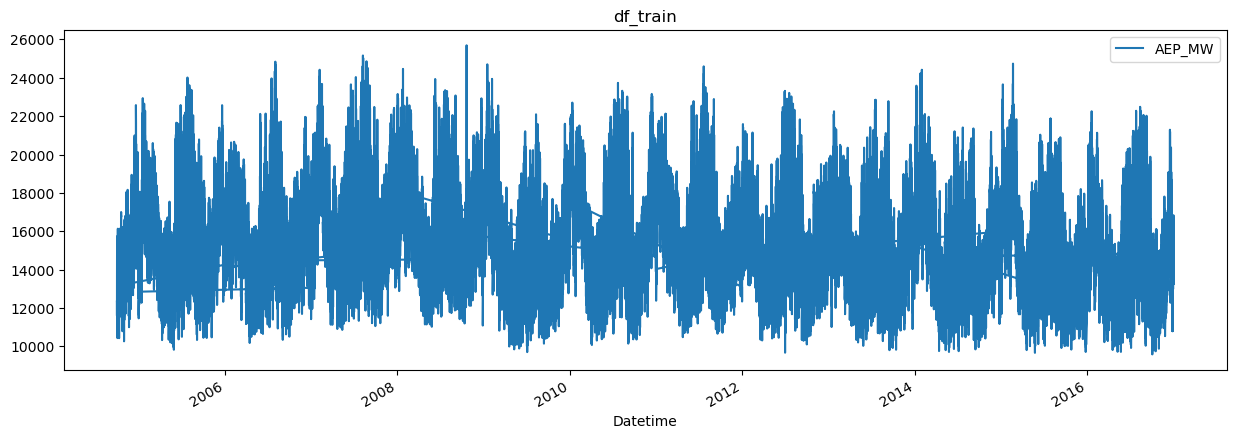

In [14]:
df_train.plot(figsize=(15, 5),
          ms=1,
          title='df_train')
plt.show()

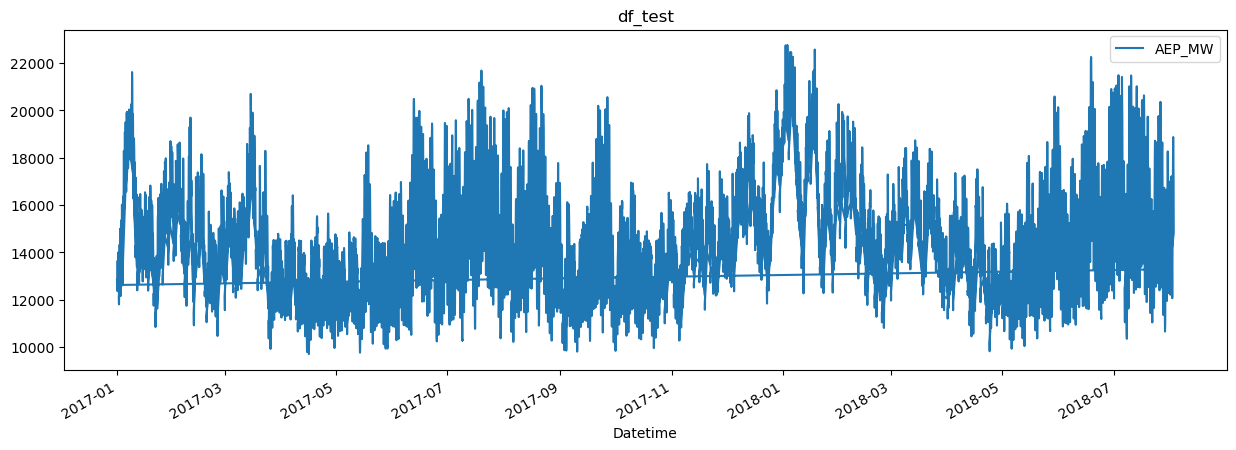

In [15]:
df_test.plot(figsize=(15, 5),
          ms=1,
          title='df_test')
plt.show()

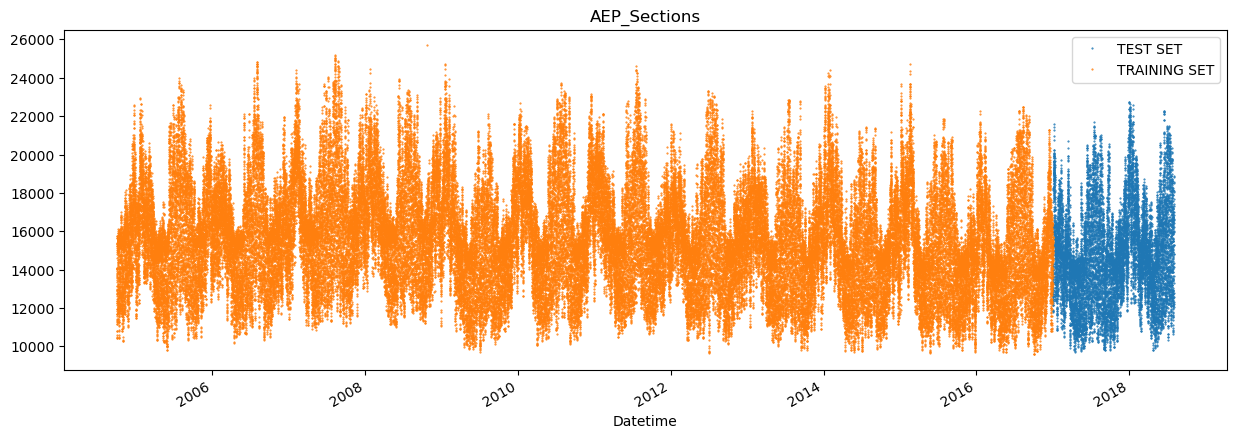

In [16]:
df_test .rename(columns={'AEP_MW': 'TEST SET'}).join(df_train.rename(columns={'AEP_MW': 'TRAINING SET'}),\
          how='outer') \
    .plot(figsize=(15, 5), title='AEP_Sections', style='.', ms=1)
plt.show()

## **Prophet Model**

In [18]:
df_train_prophet = df_train.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'AEP_MW':'y'})

In [19]:
model = Prophet()
model.fit(df_train_prophet)

12:27:49 - cmdstanpy - INFO - Chain [1] start processing
12:28:43 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
df_test_prophet = df_test.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'AEP_MW':'y'})

df_test_fcst = model.predict(df_test_prophet)

In [21]:
df_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01 01:00:00,14679.055025,10251.651333,14180.268693,14679.055025,14679.055025,-2473.434709,-2473.434709,-2473.434709,-1526.719315,...,-1505.202401,-1505.202401,-1505.202401,558.487007,558.487007,558.487007,0.0,0.0,0.0,12205.620316
1,2017-01-01 02:00:00,14679.042993,9497.818053,13577.096360,14679.042993,14679.042993,-3069.343625,-3069.343625,-3069.343625,-2110.034314,...,-1519.962926,-1519.962926,-1519.962926,560.653616,560.653616,560.653616,0.0,0.0,0.0,11609.699369
2,2017-01-01 03:00:00,14679.030961,9228.864558,13429.676178,14679.030961,14679.030961,-3410.314617,-3410.314617,-3410.314617,-2443.910109,...,-1529.250879,-1529.250879,-1529.250879,562.846372,562.846372,562.846372,0.0,0.0,0.0,11268.716345
3,2017-01-01 04:00:00,14679.018929,9416.615774,13229.055273,14679.018929,14679.018929,-3447.716041,-3447.716041,-3447.716041,-2479.837476,...,-1532.943795,-1532.943795,-1532.943795,565.065229,565.065229,565.065229,0.0,0.0,0.0,11231.302888
4,2017-01-01 05:00:00,14679.006897,9481.869635,13398.152196,14679.006897,14679.006897,-3149.170667,-3149.170667,-3149.170667,-2185.524904,...,-1530.955905,-1530.955905,-1530.955905,567.310142,567.310142,567.310142,0.0,0.0,0.0,11529.836230


from here the only importants are `yhat_lower`, `yhat_upper` and `yhat` 

## **Visualizing of the results**

**Checking the results from the model**

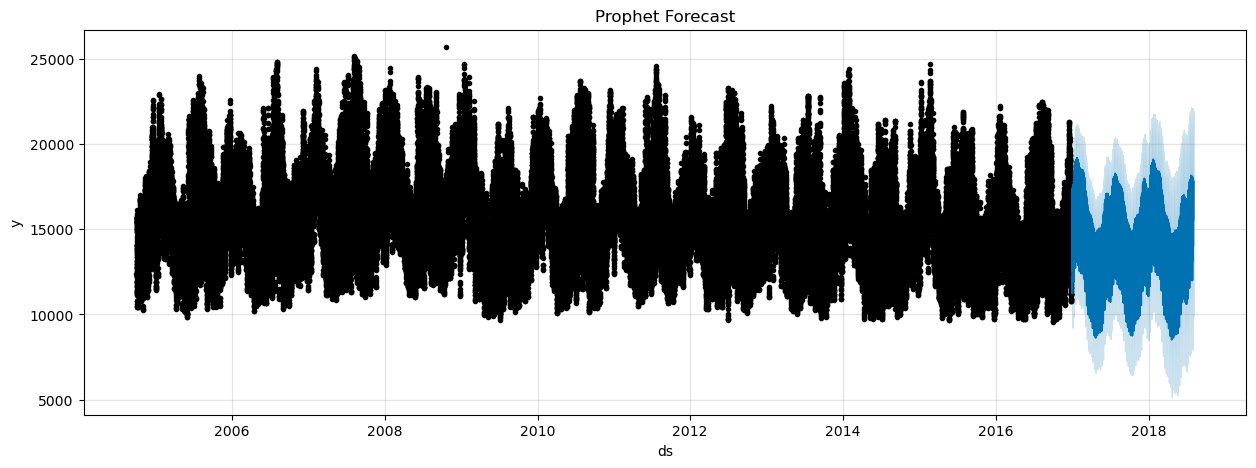

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
fig = model.plot(df_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

**Comparing the actual values vs the model**
- The model is the blue one and 
- The red one is the actual values
- The light blue is the confidence interval

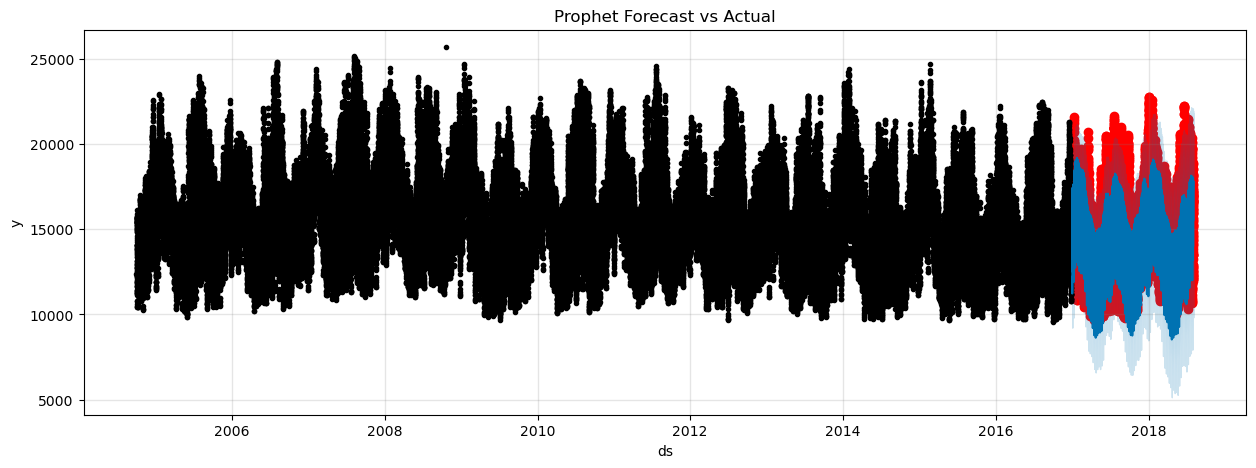

In [27]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df_test.index, df_test['AEP_MW'], color='r')
ax.set_title('Prophet Forecast vs Actual')
fig = model.plot(df_test_fcst, ax=ax)

## **Checking the error**

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [30]:
np.sqrt(mean_squared_error(y_true=df_test['AEP_MW'],
                   y_pred=df_test_fcst['yhat']))

2244.3952727812107

In [31]:
mean_absolute_error(y_true = df_test['AEP_MW'],
                   y_pred = df_test_fcst['yhat'])

1782.0750129567782

In [32]:
mean_absolute_percentage_error(y_true=df_test['AEP_MW'],
                   y_pred=df_test_fcst['yhat'])*100

12.087331129886142

**As we can see we have a 12.08% error from the model versus the model**
- We have significat errors as result our ` Mean Squared Error`  is a elevate value
- We should evalute the stationarity to have a better result
- As well we shall consider another parameters for the model

# Using holidays

In [35]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()

In [36]:
holidays = cal.holidays(start=df.index.min(),
                        end=df.index.max(),
                        return_name=True)
holiday_df = pd.DataFrame(data=holidays,
                          columns=['holiday'])
holiday_df = holiday_df.reset_index().rename(columns={'index':'ds'})

In [37]:
holiday_df.head()

,ds,holiday
0,2004-10-11,Columbus Day
1,2004-11-11,Veterans Day
2,2004-11-25,Thanksgiving Day
3,2004-12-24,Christmas Day
4,2004-12-31,New Year's Day


In [38]:
model_with_holidays = Prophet(holidays=holiday_df)
model_with_holidays.fit(df_train_prophet)

12:28:52 - cmdstanpy - INFO - Chain [1] start processing
12:30:37 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
test_with_hols = model_with_holidays.predict(df=df_test_prophet)

## **Checking the error**

In [41]:
np.sqrt(mean_squared_error(y_true=df_test['AEP_MW'],
                   y_pred=test_with_hols['yhat']))

2261.4742550343663

In [42]:
mean_absolute_error(y_true=df_test['AEP_MW'],
                   y_pred=test_with_hols['yhat'])

1794.694264333992

In [43]:
mean_absolute_percentage_error(y_true=df_test['AEP_MW'],
                   y_pred=test_with_hols['yhat'])*100

12.173243640286772

**As we can see, the inclusion of holidays did not improve the model's performance as expected.
This suggests that incorporating holidays in this particular dataset may not have had a significant impact on energy consumption patterns or added unnecessary complexity to the model.**